In [4]:
print("Hello world")

Hello world


In [5]:
print(all)

<built-in function all>


In [6]:
print("aq")

aq


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# データの読み込み
train = pd.read_csv('../input/train.csv')

# --- ステップ1: データの概観 ---
# print(train.info())
# print(train.describe())
print(train.head())




   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# --- ステップ2: カテゴリ変数の生存率分析 ---
Pclass_alive = train.groupby("Pclass")["Survived"].mean()
Sex_alive = train.groupby("Sex")["Survived"].mean()
Embarked_alive = train.groupby("Embarked")["Survived"].mean()

print(f"Pclass: {Pclass_alive}")
print(f"Sex: {Sex_alive}")
print(f"Embarked: {Embarked_alive}")

Pclass: Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Sex: Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Embarked: Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


p-value: 0.10141111018860959
Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64


/tmp/ipykernel_1081/1296787341.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train, x='Age', hue='Survived', shade=True)


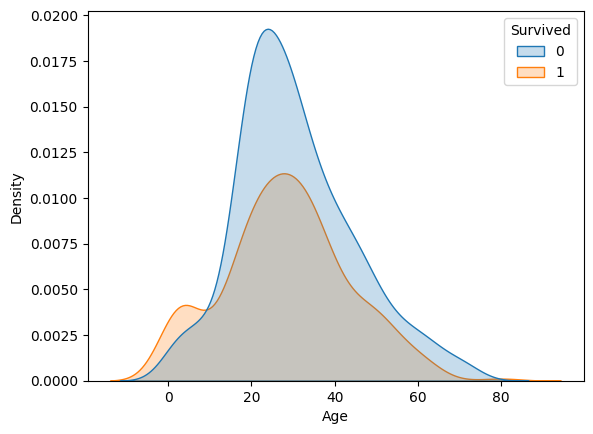

In [10]:
# --- ステップ3: 可視化 ---
from scipy.stats import chi2_contingency
sns.kdeplot(data=train, x='Age', hue='Survived', shade=True)

contingency_table = pd.crosstab(train['Age'], train['Survived'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"p-value: {p}")
Age_alive = train.groupby("Age")["Survived"].mean()
print(Age_alive)


In [20]:
df = pd.read_csv('../input/train.csv')
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  FamilySize Title  
0      0         A/5 21171   7.2500   NaN        S           2    Mr  
1      0          PC 17599  71.2833   C85        C           2   Mrs  
2      0  STON/O2. 3101282   7.9250   NaN        S           1  Miss  
3      0            113803  53.1000 

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_1081/1382289378.py:3: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [21]:
df = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

def extract_features(df):
    # 1. FamilySize の作成
    # 課題: SibSp + Parch + 1 (自分) を計算して FamilySize カラムを作成してください
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    
    # 2. 敬称 (Title) の抽出
    # 定石コードを提示します。正規表現で名前から敬称を抜き出します。
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # 3. 敬称の統合
    # 課題: 希少な敬称（Dr, Rev, Captなど）を 'Rare' に、
    # 'Mlle' 'Ms' を 'Miss' に、'Mme' を 'Mrs' に置換してください。
    # ヒント: df['Title'].replace(['Mlle','Ms'], 'Miss', inplace=True) などを使用
    df["Title"].replace(["Mlle", "Ms"], "Miss", inplace=True)
    df["Title"].replace("Mme", "Mrs", inplace=True)

    return df

train_data = extract_features(df)
test_data = extract_features(test)

# 結果の確認
print(train_data[['Title', 'Survived']].groupby(['Title']).mean())

          Survived
Title             
Capt      0.000000
Col       0.500000
Countess  1.000000
Don       0.000000
Dr        0.428571
Jonkheer  0.000000
Lady      1.000000
Major     0.500000
Master    0.575000
Miss      0.702703
Mr        0.156673
Mrs       0.793651
Rev       0.000000
Sir       1.000000


<>:11: SyntaxWarning: invalid escape sequence '\.'
<>:11: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_1081/321430845.py:11: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
/tmp/ipykernel_1081/321430845.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Title"].replace(["Mlle", "Ms"], "Miss", inplace=True)
/tmp/ipykernel_1081/321430845.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assign

In [24]:
print(train_data[['Title', 'Survived']].groupby(['Title']).mean())
print(type(train_data[['Title', 'Survived']].groupby(['Title']).mean()))

          Survived
Title             
Capt      0.000000
Col       0.500000
Countess  1.000000
Don       0.000000
Dr        0.428571
Jonkheer  0.000000
Lady      1.000000
Major     0.500000
Master    0.575000
Miss      0.702703
Mr        0.156673
Mrs       0.793651
Rev       0.000000
Sir       1.000000
<class 'pandas.core.frame.DataFrame'>


In [25]:
print(train_data.groupby('Title')['Survived'].mean())
print(type(train_data.groupby('Title')['Survived'].mean()))

Title
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.702703
Mr          0.156673
Mrs         0.793651
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64
<class 'pandas.core.series.Series'>


In [27]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
Title            0
dtype: int64
